In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df = pd.read_excel(r'C:\Users\Thippesh\my projects\medha_tech_intern\student dropout.xlsx')

In [3]:
df.shape
# df.info
# df.columns
# df.dtypes
df.isnull().sum()

School                         0
Gender                         0
Age                            0
Address                        0
Family_Size                    0
Parental_Status                0
Mother_Education               0
Father_Education               0
Mother_Job                     0
Father_Job                     0
Reason_for_Choosing_School     0
Guardian                       0
Travel_Time                    0
Study_Time                     0
Number_of_Failures             0
School_Support                 0
Family_Support                 0
Extra_Paid_Class               0
Extra_Curricular_Activities    0
Attended_Nursery               0
Wants_Higher_Education         0
Internet_Access                0
In_Relationship                0
Family_Relationship            0
Free_Time                      0
Going_Out                      0
Weekend_Alcohol_Consumption    0
Weekday_Alcohol_Consumption    0
Health_Status                  0
Number_of_Absences             0
Grade_1   

In [4]:
dropout_count = df.Dropped_Out.value_counts()
# df.Dropped_Out.value_counts()
dropout_percent = df.Dropped_Out.value_counts(normalize=True) * 100

Dropout Distribution:
  Continued: 549 (84.6%)
  Dropped Out: 100 (15.4%)


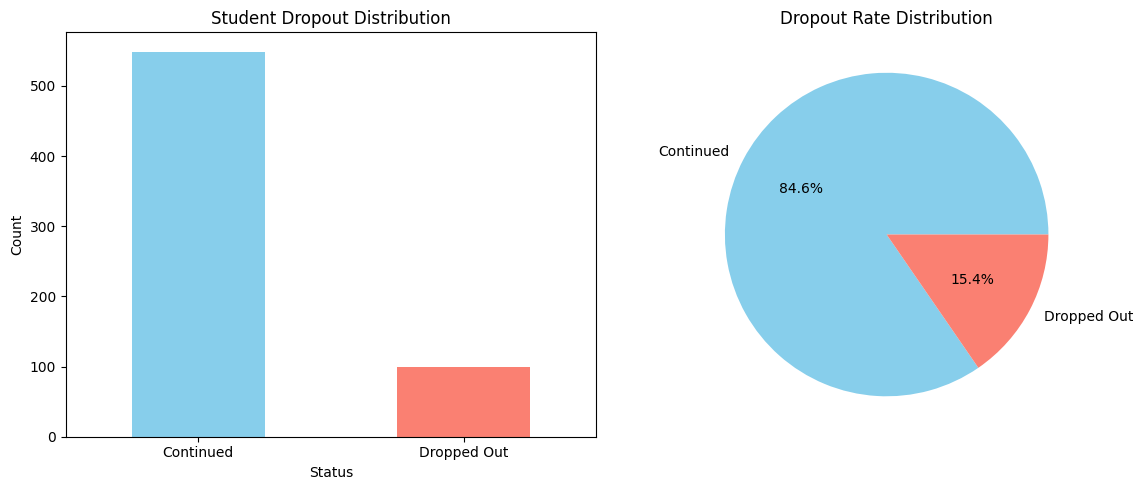

In [5]:
print("Dropout Distribution:")
for i, (status, count) in enumerate(dropout_count.items()):
    print(f"  {'Dropped Out' if status else 'Continued'}: {count} ({dropout_percent.iloc[i]:.1f}%)")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

dropout_count.plot(kind='bar', ax=ax1, color=['skyblue', 'salmon'])
ax1.set_title('Student Dropout Distribution')
ax1.set_xlabel('Status')
ax1.set_ylabel('Count')
ax1.set_xticklabels(['Continued', 'Dropped Out'], rotation=0)

ax2.pie(dropout_count.values, labels=['Continued', 'Dropped Out'], 
        autopct='%1.1f%%', colors=['skyblue', 'salmon'])
ax2.set_title('Dropout Rate Distribution')

plt.tight_layout()
plt.show()

In [6]:
len(df.select_dtypes(include=[np.number]).columns.tolist())

16

In [7]:
print("statistical_summary")
df.describe()

statistical_summary


,Age,Mother_Education,Father_Education,Travel_Time,Study_Time,Number_of_Failures,Family_Relationship,Free_Time,Going_Out,Weekend_Alcohol_Consumption,Weekday_Alcohol_Consumption,Health_Status,Number_of_Absences,Grade_1,Grade_2,Final_Grade
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


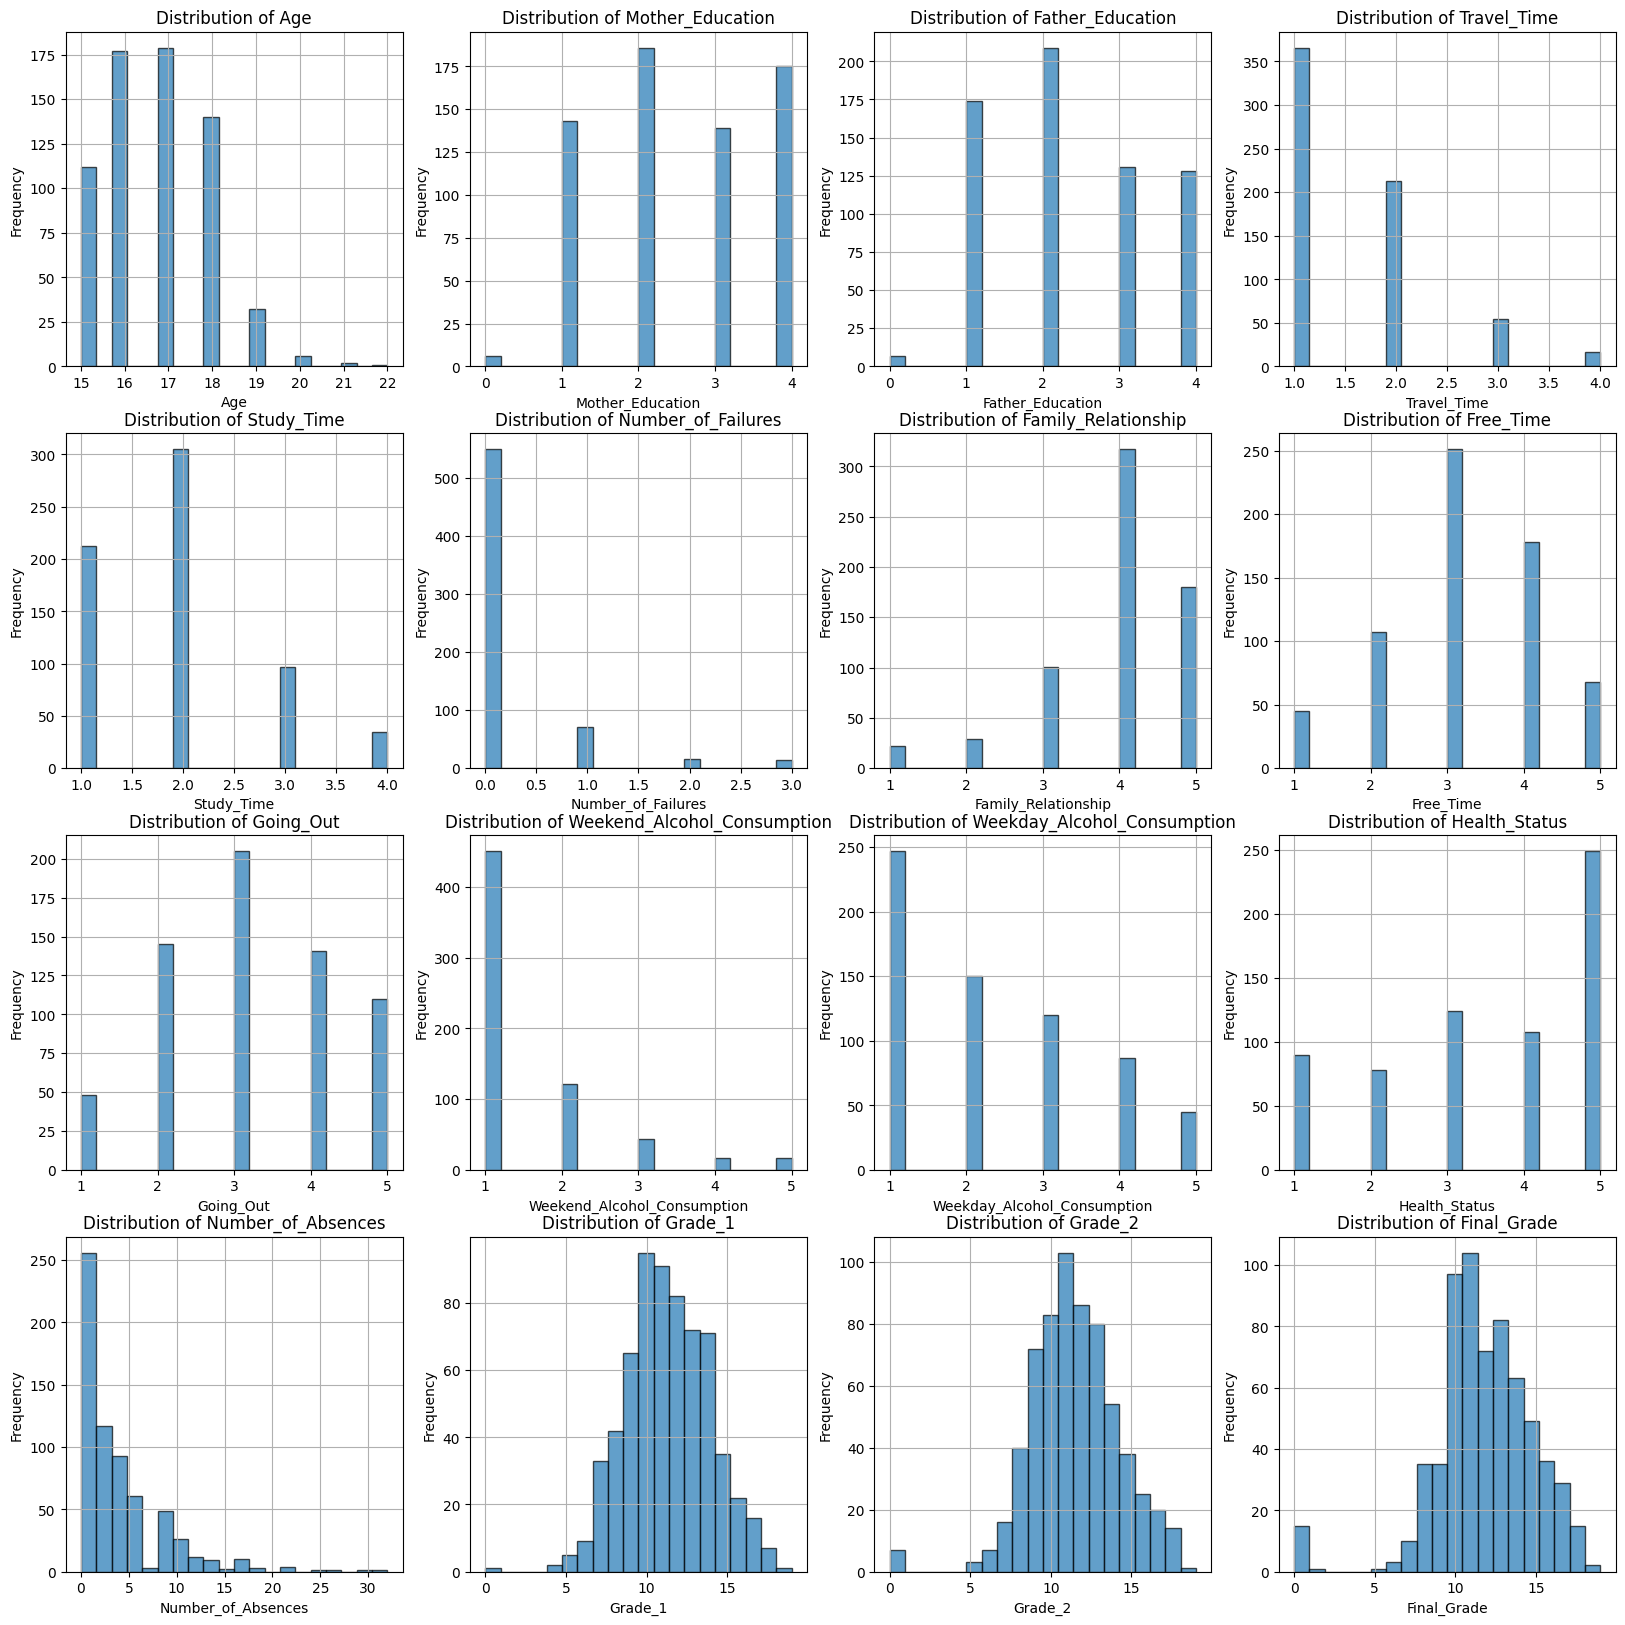

In [8]:
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
n_cols = 4
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols
    
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5*n_rows))
axes = axes.flatten() if n_rows > 1 else [axes] if n_rows == 1 else axes
    
for i, col in enumerate(numerical_cols):
    if i < len(axes):
        df[col].hist(bins=20, ax=axes[i], alpha=0.7, edgecolor='black')
        axes[i].set_title(f'Distribution of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')
for i in range(len(numerical_cols), len(axes)):
        axes[i].set_visible(False)


In [9]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(len(categorical_cols))
print("Categorical Columns and Unique Value Counts:")


for col in categorical_cols:
        unique_count = df[col].nunique()
        print(f"  - {col}: {unique_count} unique values")


for col in categorical_cols:
        print(f"\n{col}:")
        print(df[col].value_counts())

17
Categorical Columns and Unique Value Counts:
  - School: 2 unique values
  - Gender: 2 unique values
  - Address: 2 unique values
  - Family_Size: 2 unique values
  - Parental_Status: 2 unique values
  - Mother_Job: 5 unique values
  - Father_Job: 5 unique values
  - Reason_for_Choosing_School: 4 unique values
  - Guardian: 3 unique values
  - School_Support: 2 unique values
  - Family_Support: 2 unique values
  - Extra_Paid_Class: 2 unique values
  - Extra_Curricular_Activities: 2 unique values
  - Attended_Nursery: 2 unique values
  - Wants_Higher_Education: 2 unique values
  - Internet_Access: 2 unique values
  - In_Relationship: 2 unique values

School:
School
GP    423
MS    226
Name: count, dtype: int64

Gender:
Gender
F    383
M    266
Name: count, dtype: int64

Address:
Address
U    452
R    197
Name: count, dtype: int64

Family_Size:
Family_Size
GT3    457
LE3    192
Name: count, dtype: int64

Parental_Status:
Parental_Status
T    569
A     80
Name: count, dtype: int64

Mot

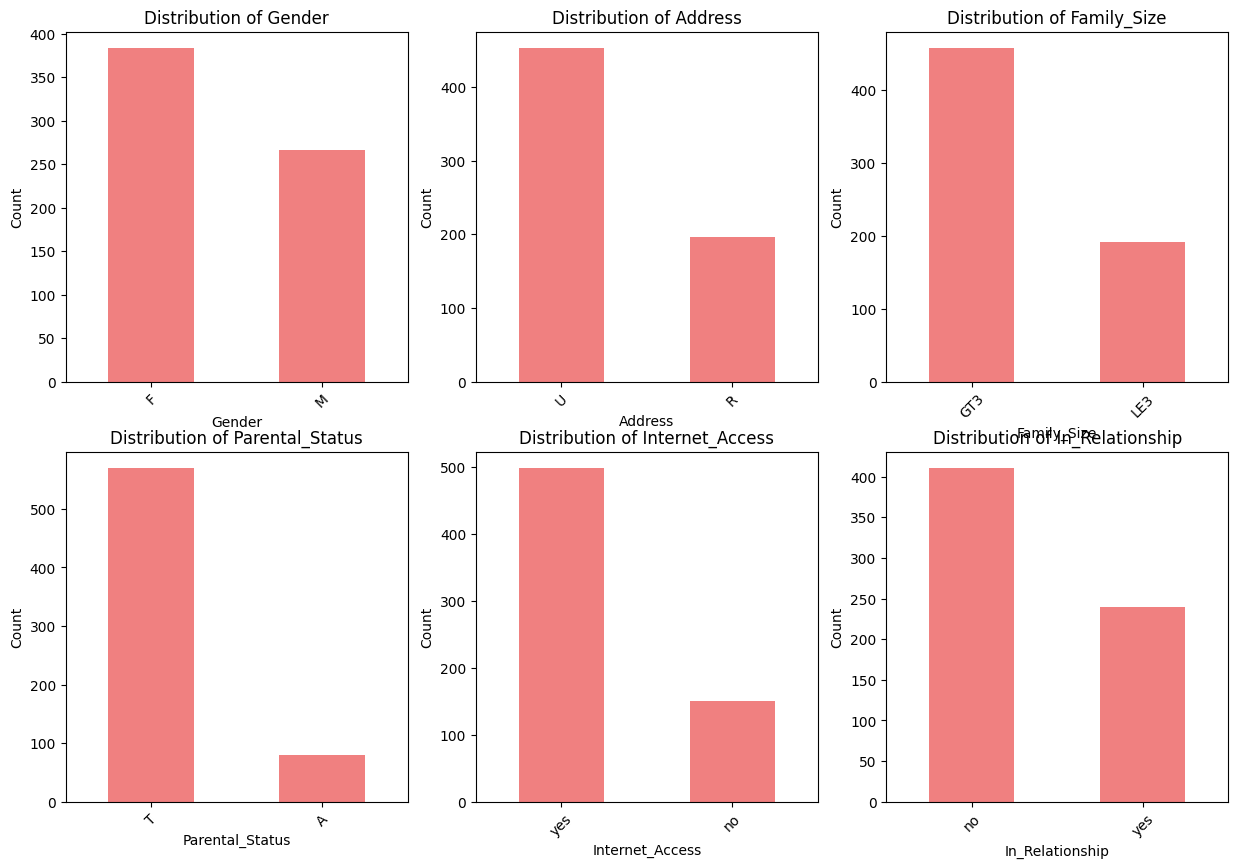

In [10]:
key_features = ['Gender', 'Address', 'Family_Size', 'Parental_Status', 'Internet_Access', 'In_Relationship']
available_features = [col for col in key_features if col in categorical_cols]
    
if available_features:
    n_cols = 3
    n_rows = (len(available_features) + n_cols - 1) // n_cols
        
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
    axes = axes.flatten() if n_rows > 1 else [axes] if n_rows == 1 else axes
        
    for i, col in enumerate(available_features):
        if i < len(axes):
            df[col].value_counts().plot(kind='bar', ax=axes[i], color='lightcoral')
            axes[i].set_title(f'Distribution of {col}')
            axes[i].set_xlabel(col)
            axes[i].set_ylabel('Count')
            axes[i].tick_params(axis='x', rotation=45)
        
    for i in range(len(available_features), len(axes)):
        axes[i].set_visible(False)
        

In [11]:
df_corr = df.copy()
df_corr['Dropped_Out'] = df_corr['Dropped_Out'].astype(int)
    
corr_matrix = df_corr[numerical_cols + ['Dropped_Out']].corr()

target_corr = corr_matrix['Dropped_Out'].sort_values(key=abs, ascending=False)

print("Correlation with Dropout Status:")
for feature, corr_val in target_corr.items():
    if feature != 'Dropped_Out':
        print(f"  {feature}: {corr_val:.3f}")

Correlation with Dropout Status:
  Final_Grade: -0.663
  Grade_2: -0.592
  Grade_1: -0.563
  Number_of_Failures: 0.380
  Study_Time: -0.165
  Father_Education: -0.146
  Mother_Education: -0.145
  Weekend_Alcohol_Consumption: 0.124
  Weekday_Alcohol_Consumption: 0.116
  Age: 0.111
  Free_Time: 0.093
  Number_of_Absences: 0.087
  Going_Out: 0.067
  Travel_Time: 0.058
  Family_Relationship: -0.045
  Health_Status: 0.010


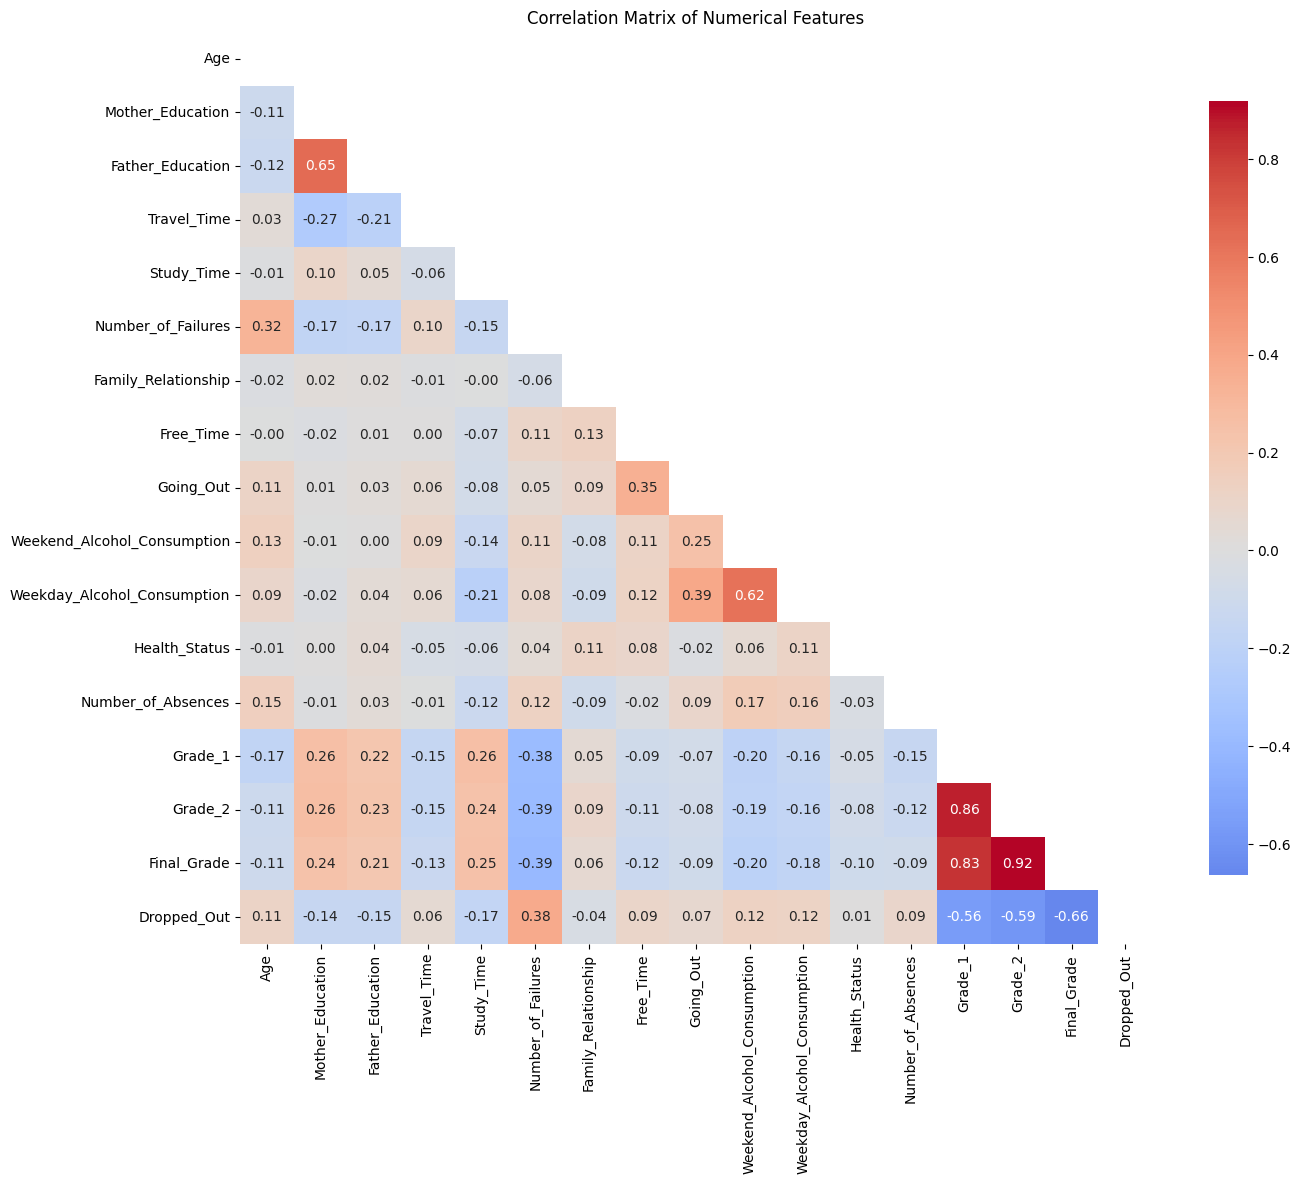

In [27]:
plt.figure(figsize=(14, 12))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', center=0, square=True, fmt='.2f', cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()


In [12]:
available_cats = [col for col in categorical_cols if col in df.columns]
    
for col in available_cats:
    print(f"\nDropout Rate by {col}:")
    dropout_by_feature = df.groupby(col)['Dropped_Out'].agg(['count', 'sum', 'mean'])
    dropout_by_feature.columns = ['Total', 'Dropped_Out', 'Dropout_Rate']
    dropout_by_feature['Dropout_Rate'] = dropout_by_feature['Dropout_Rate'] * 100
    print(dropout_by_feature)
   


Dropout Rate by School:
        Total  Dropped_Out  Dropout_Rate
School                                  
GP        423           32      7.565012
MS        226           68     30.088496

Dropout Rate by Gender:
        Total  Dropped_Out  Dropout_Rate
Gender                                  
F         383           50     13.054830
M         266           50     18.796992

Dropout Rate by Address:
         Total  Dropped_Out  Dropout_Rate
Address                                  
R          197           44     22.335025
U          452           56     12.389381

Dropout Rate by Family_Size:
             Total  Dropped_Out  Dropout_Rate
Family_Size                                  
GT3            457           76     16.630197
LE3            192           24     12.500000

Dropout Rate by Parental_Status:
                 Total  Dropped_Out  Dropout_Rate
Parental_Status                                  
A                   80           12     15.000000
T                  569        

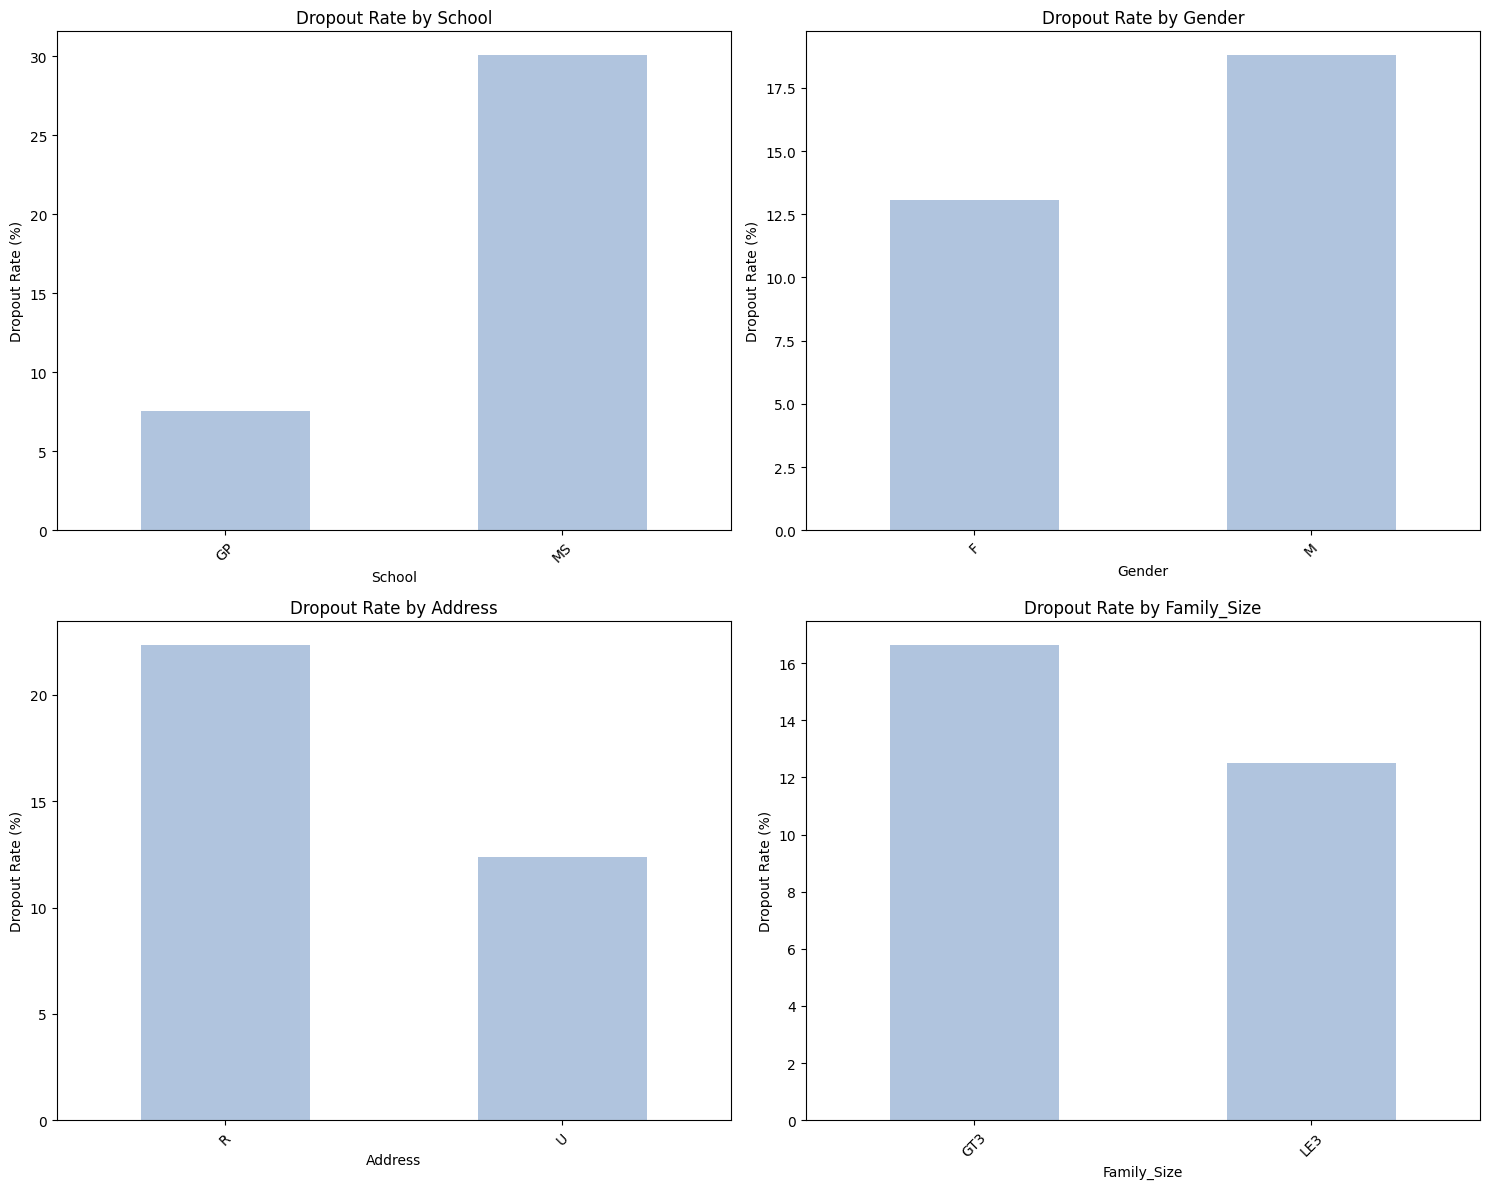

In [30]:
if available_cats:
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))
        axes = axes.flatten()
        
        for i, col in enumerate(available_cats[:4]):
            if i < len(axes):
                dropout_rates = df.groupby(col)['Dropped_Out'].mean() * 100
                dropout_rates.plot(kind='bar', ax=axes[i], color='lightsteelblue')
                axes[i].set_title(f'Dropout Rate by {col}')
                axes[i].set_ylabel('Dropout Rate (%)')
                axes[i].tick_params(axis='x', rotation=45)
        
        plt.tight_layout()
        plt.show()


In [ ]:
#split data set to train model
